In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df=pd.read_csv("UpdatedResumeDataSet.csv")

In [73]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [74]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [75]:
df.shape

(962, 2)

# Eploring Categories

In [76]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

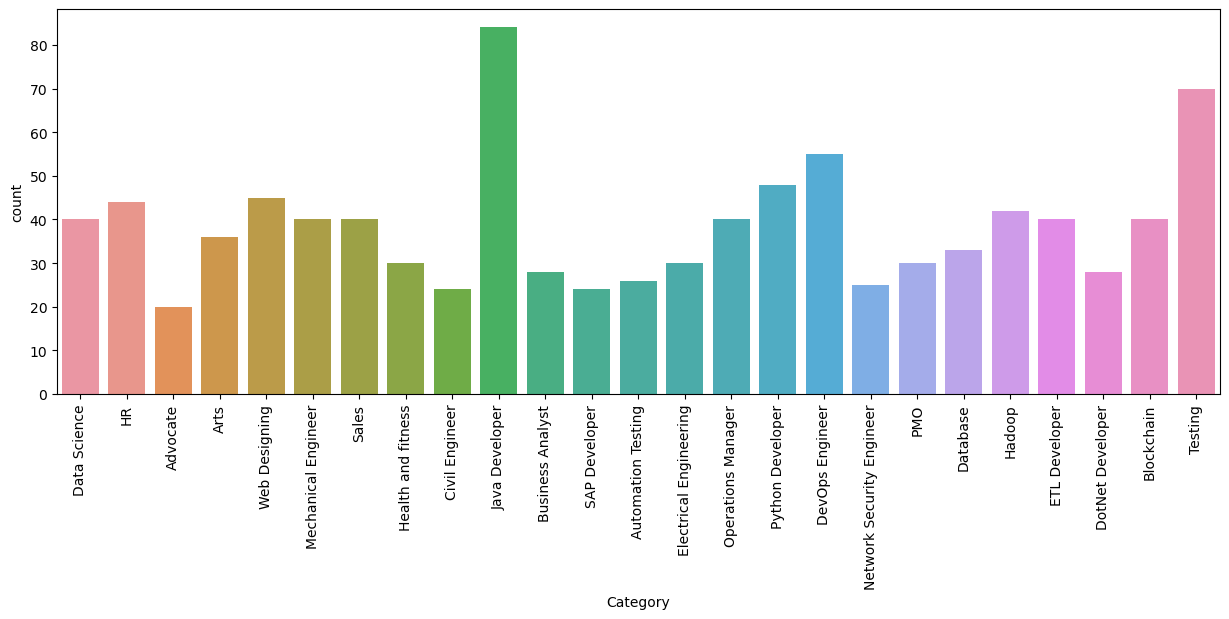

In [77]:
plt.figure(figsize=(15,5))
sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
plt.show()

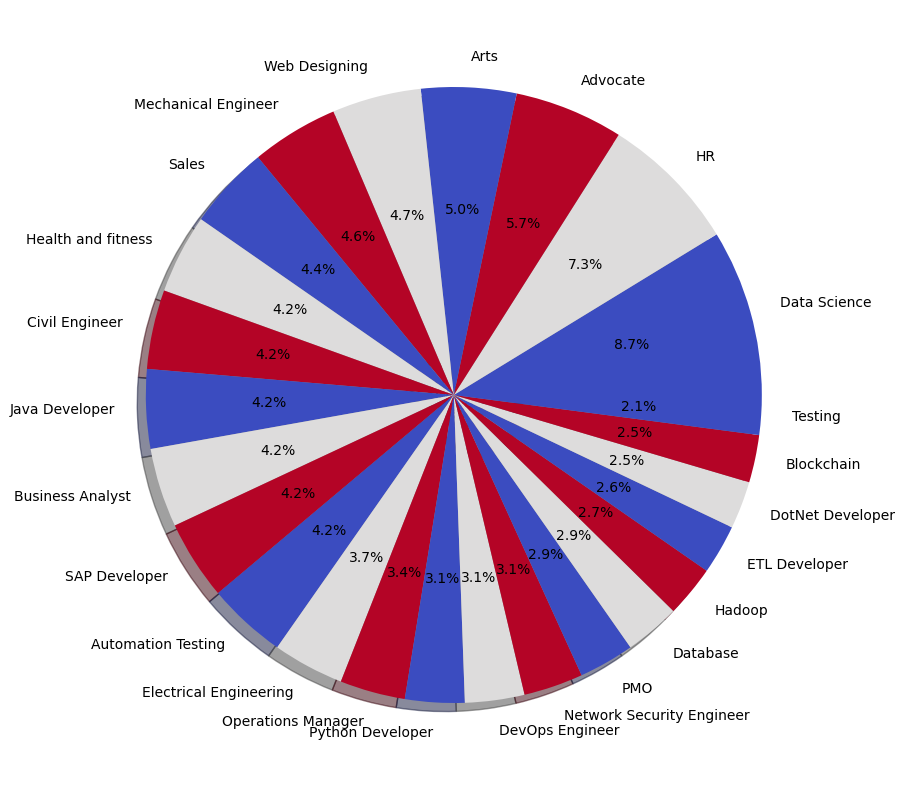

In [78]:
counts=df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True,colors=plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

In [79]:
df['Category'][0]

'Data Science'

In [80]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# Cleaning data

### 1. URLs,
### 2. hashtags,
### 3. mentions,
### 4. special letters,
### 5. punctuations:


In [81]:
import re
def cleanResume(txt):
    cleanText=re.sub('http\S+\s', ' ', txt)
    cleanText=re.sub('RT|cc', ' ', cleanText)
    cleanText=re.sub('#\S+\s', ' ', cleanText)
    cleanText=re.sub('@\S+', ' ', cleanText)
    cleanText=re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText=re.sub(r'[^\x00-\x7f]', ' ' , cleanText)
    cleanText=re.sub('\s+', ' ', cleanText)
    return cleanText

In [82]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [83]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [84]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [85]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [88]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [87]:
#( ['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#       'Mechanical Engineer', 'Sales', 'Health and fitness',
#      'Civil Engineer', 'Java Developer', 'Business Analyst',
#      'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#     'Operations Manager', 'Python Developer', 'DevOps Engineer',
#    'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#   'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'])

# Vectorization(text into some particular list of numbers)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
required_text=tfidf.transform(df['Resume'])

# Train test split

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(required_text,df['Category'],test_size=0.2,random_state=42)

In [92]:
X_train.shape

(769, 7351)

In [93]:
X_test.shape

(193, 7351)

# Model Training

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier #used because our outputs are multiclass 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [116]:
# Ensure that X_train and X_test are dense if they are sparse
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

### 1. Training KNeighborsClassifier

In [105]:
knn_model = OneVsRestClassifier(KNeighborsClassifier())
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nKNeighborsClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_knn)}")


KNeighborsClassifier Results:
Accuracy: 0.9845
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  

### Training SVC

In [114]:
svc_model = OneVsRestClassifier(SVC())
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
print("\nSVC Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svc)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")


SVC Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0 

### Training RandomForestClassifier

In [118]:
rf_model = OneVsRestClassifier(RandomForestClassifier())
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandomForestClassifier Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")


RandomForestClassifier Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0

### 4. LogisticRegression

In [119]:
lr_model = OneVsRestClassifier(LogisticRegression())
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\nLogisticRegression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_lr)}")


LogisticRegression Results:
Accuracy: 0.9948
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0 

# Save Files

In [120]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

# Prediction System

In [121]:
# Function to predict the category of a resume
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name

In [122]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [123]:

myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [124]:
myresume = """ Gaurav Kumar
B.Tech. | NIT Rourkela
Final Year, Civil Engineering.
DOB: 05 March 2002
Contact: +91 8825247369
Email.:engineerstech2524@gmail.com
Education
2021‐PRESENT
B.TECH, CIVIL ENGINEERING
NIT Rourkela
CGPA : 7.54/10
MARCH 2019
INTERMEDIATE, SCIENCE
Sardar Patel College, Hilsa
Percentage: 80.6%
JUNE 2017
MATRICULATION
High School Mai, Hilsa
Percentage: 82%
Links
LinkedIn:// [LinkedIn URL]
Github:// [GitHub URL]
Skills
GENERAL PROGRAMMING
Python, C++
OPERATING SYSTEMS
Windows
SOFTWARES
MySQL, MS Excel, Power BI
PYTHON LIBRARIES
Numpy, Pandas, Matplotlib, Seaborn
LANGUAGES
English, Hindi
SOFT SKILLS
Poetry, Problem‐Solving, Analytical Thinking
Emotional Intelligence, Time Management
Relevant Courses
SQL (Structured Query Language)
Machine Learning
Deep Learning
NLP (Natural Language Processing)
Data Analysis and Visualization
Statistical Methods for Data Science
Internship
JULY 2024 NIT Rourkela Summer Intern
Topic: IOT
• Engineered a reliable system for controlling an IR sensor and
LED using Arduino Uno, ensuring robust functionality.
• Developed a moisture monitoring system for different types
of soil utilizing Arduino Uno and soil moisture sensors.
• Developed a precision stepper motor control system.
• Created an IoT‐based water monitoring system using ESP32
for precise real‐time data collection, analysis, and reporting.
Projects
SEP 2024 Real Estate Price Prediction Machine Learning
• Developed a model to predict Bangalore home prices with
an R² score of 0.86 and a cross‐val score of 0.87.
• Collected, cleaned, and preprocessed the raw dataset.
• Applied various algorithms to predict the price and metrics
to evaluate the performance of the M.L model.
AUG 2024 Face Mask Detection Deep Learning
• Built a Face Mask Detection System with 94 % accuracy us‐
ing Tensorflow/Keras, CNN, and OpenCV architecture.
• Preprocessed 7,000+ images with resizing and scaling.
• Created a prediction function to reduce effort by 80%.
• Evaluated with accuracy metrics and visualized by graphs.
JULY 2024 Resume Screening N.L.P + Python
• Developed a System to automate resume evaluation.
• Applied NLP to analyze textual data from resumes.
• Leveraged Python for backend development and Streamlit
for creating an interactive user interface.
Certification/Achievement
AUG 2024 Structured Query Language Scaler Topics
DEC 2023 C++ Programming Coursera
NOV 2023 Intra Hall Poetry Competition Winner
Extra Curricular Activities
2021‐NOW Treasurer, Hindi/Urdu Poet Kalaam
2021‐NOW Design and Management Head EBSB
2021‐NOW Management Head CEST
MAR. 2023 Event Manager, Accommodation Team Nitrutsav
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Data Science'

In [125]:
myresume = """Atul Kumar
 B.Tech. | NIT Rourkela
 Final Year, Civil Engineering
 DOB: 16 June 2002
 Contact: +91 6299569710
 Email.:atul134hd@gmail.com
 Education
 2021‐PRESENT
 B.TECH., CIVIL ENGINEERING
 NIT Rourkela
 CGPA : 7.81/10
 MAY2020
 INTERMEDIATE
 Bright Career School , Purnea(Bihar)
 Percentage: 91.4%
 MAY2013
 MATRICULATION
 Bright Career School , Purnea(Bihar)
 Percentage: 91.4%
 Links
 LinkedIn:// Atul Kumar
 Github// atul108roy
 LeetCode:// Atul4Roy
 Skills
 GENERAL PROGRAMMING
 C++, Python, JavaScript, SQL
 WEBDEVELOPMENT
 HTML, CSS, React.js, Node.js
 SOFTWARES
 VS Code
 OPERATING SYSTEMS
 Windows,MacOS
 LANGUAGES
 English, Hindi
 Relevant Courses
 Data Structures
 Algorithm
 Operating System
 MySQL
 Computer Networking
 Data Base Management System
 Work Experience/Projects
 JULY 2024 Parking Monitoring System
 Project
 Created a web‐based parking monitoring system featuring
 parking slot availability display, route finding, and vehicle
 management.
 Utilized HTML, CSS, JavaScript for the frontend, Node.js for
 backend logic, and MySQL for database storage; integrated
 SMSnotifications.
 Designed and implemented a wallet system for payments
 (not yet activated), ensuring future seamless transactions.
 MAY2023 HotelBooking App
 React App
 Developed a multi‐pagehotel booking app using React with
 dynamic routing and reusable components like Navbar and
 Footer.
 Ensured responsive design and organized structure, high
lighting expertise in frontend development and scalable
 UI/UX.
 DEC 2022 Dynamic Multi‐Page Website
 Website
 Developed a responsive website using CSS media queries
 for seamless performance across devices.
 Implemented interactive features with JavaScript, enhan
cing user engagement and creating a dynamic, visually
 appealing browsing experience.
 Certifications
 JULY 2024 Responsive Web Design
 JUNE 2024 SQL Certification
 MAY2023 DataStructures Algorithm
 FEB 2023 C++ certificate
 Extra Curricular Activities
 2023‐2024 Cultural Secretary
 freeCodeCamp
 Coursera
 Udemy
 Code Help
 MSSHall
 Organized cultural events for hall residents and coordinated
 teams for successful execution.
 2022‐2023 Degine Team Head
 CEST Club
 Led a team of 18 for the Annual Cultural Fest, overseeing
 arrangements and coordination for success.
 FEB. 2023 Event Management(Core Team)
 Cosmo
 Core team member of event management, leading efforts
 to ensure successful execution.
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Civil Engineer'

In [126]:
myresume = """[Your Name]
[Your Address], [City, State]
[Your Email Address] | [Your Phone Number]
[LinkedIn Profile] (optional)
Professional Summary
Results-driven corporate lawyer with 8+ years of experience ensuring the legality of commercial transactions. Adept at drafting and reviewing policies, and client negotiation. Possess a J.D. from Duke Law School and am a member of the New York State Bar in good standing. Achieved advantageous settlements in 90% of cases.
Professional Experience
General Counsel
Rockford Corporation, New York, NY | May 20XX – Present
Define and develop legal policies and procedures while advising on all major business transactions
Draft and review contracts and internal policies in accordance with all applicable regulations
Negotiate with opposing parties to avoid litigation and reach resolutions. Have thus far overseen 20+ mediations, achieving a 90% settlement rate
Reduced corporation’s reliance on external legal counsel, decreasing legal fees by over 60% annually
Implemented a global intellectual property strategy over a 4-year period
Staff Attorney
BAC Corporation, New York, NY | August 20XX – April 20XX
Advised executives regarding legal rights, opportunities, and obligations
Conducted legal research and reviewed transactions to ensure maximum benefit to the company with minimal risk
Drafted and renewed agreements on a weekly basis for product distribution, supply, licensing, and advertising
Maintained a 95% satisfaction rate with company executives
Monitored changes to employment law at federal, state, and national levels
Education
Bar Admissions, New York | December 20XX
Duke University School of Law | J.D. | May 20XX
University of Texas | B.A. Political Science | 20XX
Skills
Corporate law
Written and oral communication
Legal research
Time management
Critical thinking
Negotiation and settlement
Documentation
Mediation
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Advocate'